In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [4]:
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')


In [5]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
sales_price = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [8]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
sales_price.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,179183.918243
std,421.321334,16518.303051
min,1461.000000,135751.318893
25%,1825.500000,168703.011202
50%,2190.000000,179208.665698
75%,2554.500000,186789.409363
max,2919.000000,281643.976117


In [10]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
sales_price.isnull().sum()

Id           0
SalePrice    0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


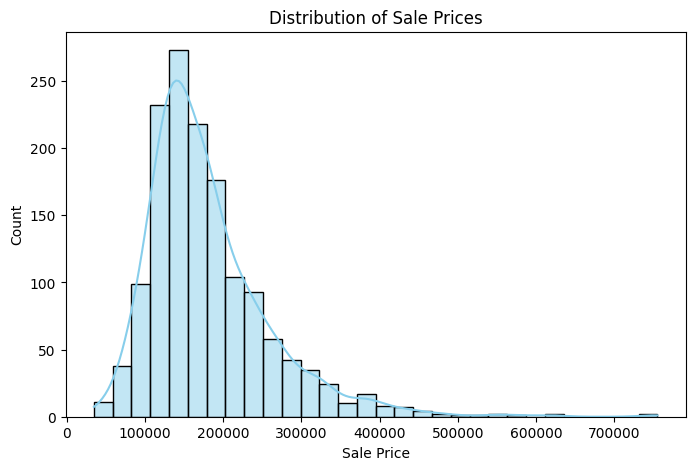

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data=train_data, x="SalePrice", kde=True, color="skyblue", bins=30)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.show()


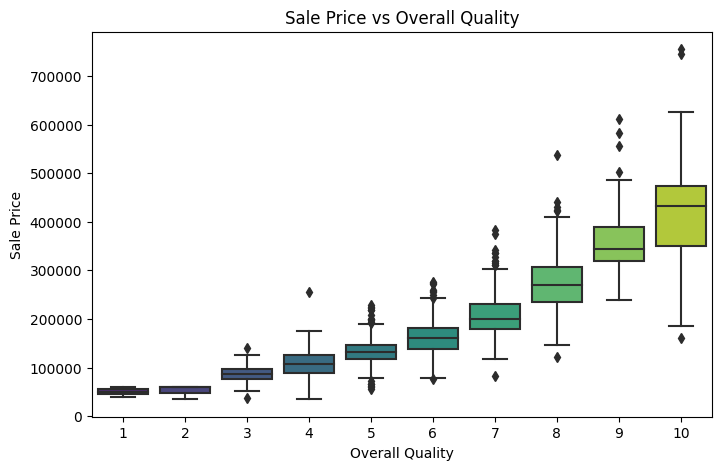

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=train_data, x="OverallQual", y="SalePrice", palette="viridis")
plt.title("Sale Price vs Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()


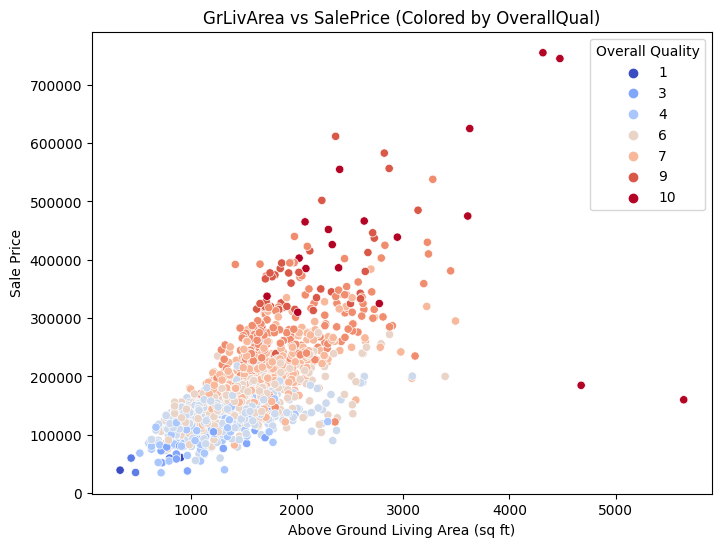

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_data, x="GrLivArea", y="SalePrice", hue="OverallQual", palette="coolwarm")
plt.title("GrLivArea vs SalePrice (Colored by OverallQual)")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.legend(title="Overall Quality")
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


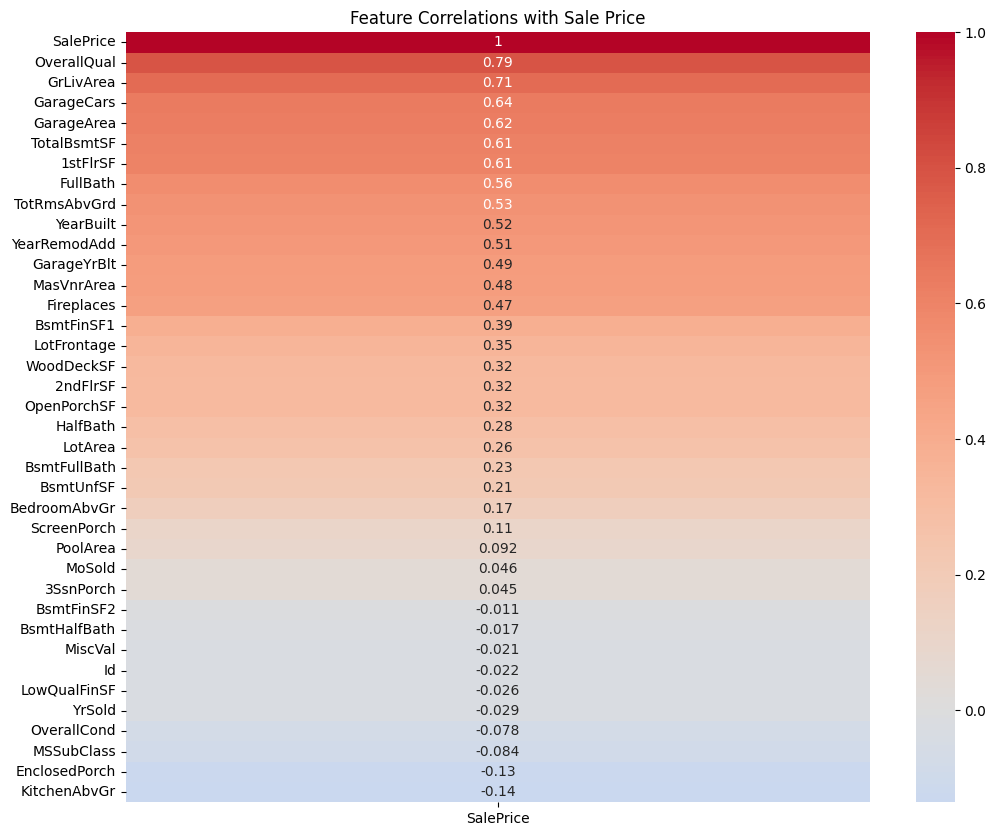

In [18]:
plt.figure(figsize=(12,10))
corr = train_data.corr(numeric_only=True)
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlations with Sale Price")
plt.show()


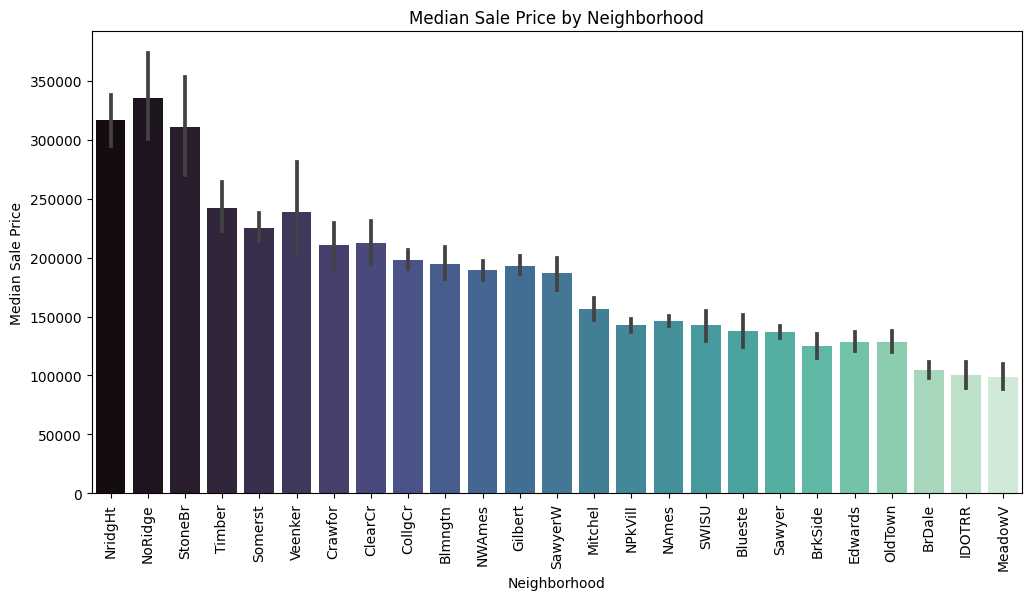

In [20]:
plt.figure(figsize=(12,6))
order = train_data.groupby("Neighborhood")["SalePrice"].median().sort_values(ascending=False).index
sns.barplot(data=train_data, x="Neighborhood", y="SalePrice", order=order, palette="mako")
plt.title("Median Sale Price by Neighborhood")
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Median Sale Price")
plt.show()


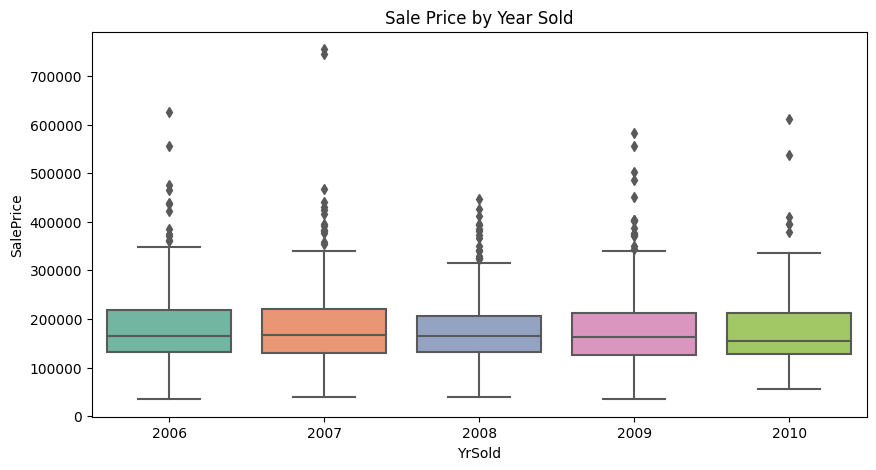

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_data, x="YrSold", y="SalePrice", palette="Set2")
plt.title("Sale Price by Year Sold")
plt.show()


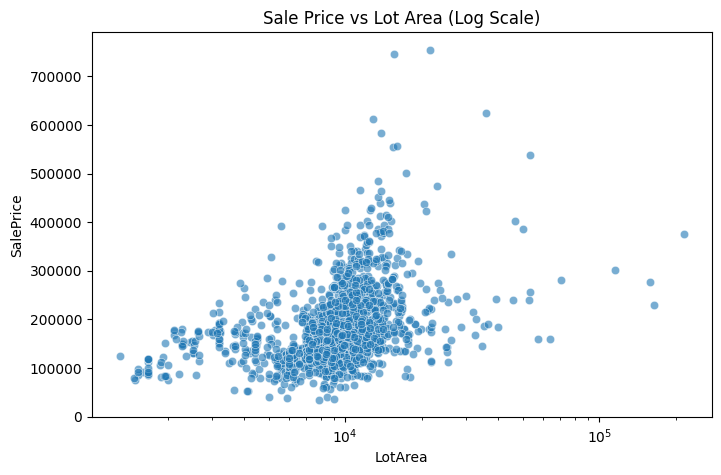

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=train_data, x="LotArea", y="SalePrice", alpha=0.6)
plt.xscale("log")
plt.title("Sale Price vs Lot Area (Log Scale)")
plt.show()


**Build a model to predict pricing based on both machine learning and logic**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score


# Basic cleaning
train_data = train_data.dropna(subset=["SalePrice"])
train_data.fillna(train_data.median(numeric_only=True), inplace=True)

features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    'YearBuilt', 'FullBath', 'Neighborhood', 'LotArea', 'KitchenQual'
]

X = train_data[features]
y = train_data['SalePrice']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestRegressor

base_model = RandomForestRegressor(
    n_estimators=1000,   
    max_depth=6,        
    max_samples=0.8,     
    max_features=0.8,    
    random_state=42,
    n_jobs=-1            
)

base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)


print("Base Model MAE:", mean_absolute_error(y_test, y_pred))
print("Base Model R²:", r2_score(y_test, y_pred))

Base Model MAE: 19393.153138024925
Base Model R²: 0.8856572068460615


In [26]:

y_pred_hybrid = y_pred.copy()

# Penalize very poor overall condition
poor_cond_mask = X_test['OverallQual'] <= 4
y_pred_hybrid[poor_cond_mask] *= 0.9  # reduce predicted price by 10%

#  Reward recent houses (built after 2000)
new_house_mask = X_test['YearBuilt'] > 2000
y_pred_hybrid[new_house_mask] *= 1.05  # increase by 5%

# Cap extreme predictions for small homes
small_home_mask = X_test['GrLivArea'] < 800
y_pred_hybrid[small_home_mask] = np.minimum(y_pred_hybrid[small_home_mask], 150000)

# High-end neighborhood uplift
luxury_hoods = ['NridgHt', 'NoRidge', 'StoneBr']
for hood in luxury_hoods:
    if f"Neighborhood_{hood}" in X_test.columns:
        hood_mask = X_test[f"Neighborhood_{hood}"] == 1
        y_pred_hybrid[hood_mask] *= 1.1


In [27]:
print("Hybrid Model MAE:", mean_absolute_error(y_test, y_pred_hybrid))
print("Hybrid Model R²:", r2_score(y_test, y_pred_hybrid))


Hybrid Model MAE: 18925.487248432404
Hybrid Model R²: 0.894886545285611


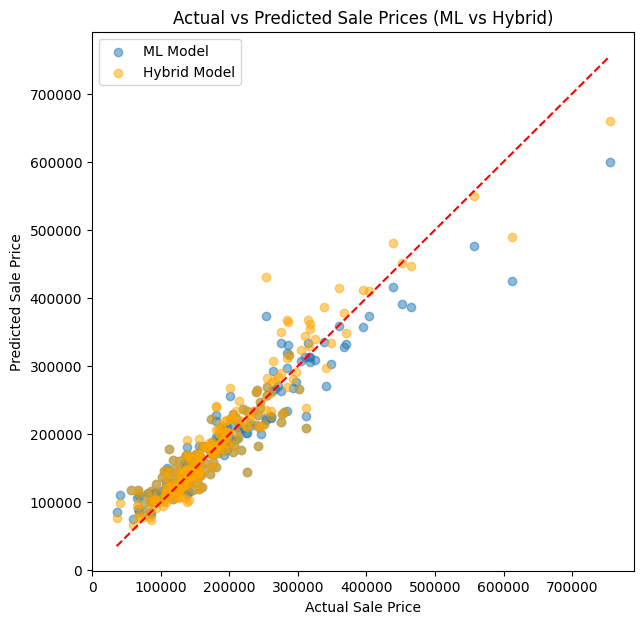

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.5, label='ML Model')
plt.scatter(y_test, y_pred_hybrid, alpha=0.5, label='Hybrid Model', color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.title("Actual vs Predicted Sale Prices (ML vs Hybrid)")
plt.show()


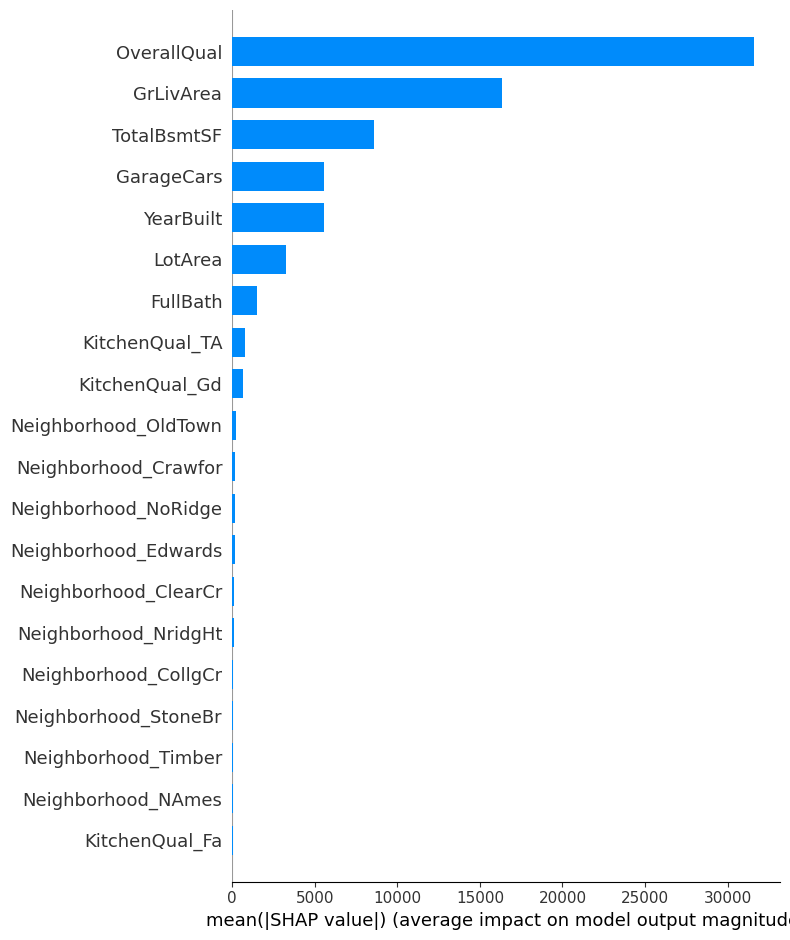

In [29]:
import shap

explainer = shap.TreeExplainer(base_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
